# 4. K-Nearest Neighbor Classification

Nearest Neighbor Classifier belajar berdasarkan analogi dengan cara mengkomparasikan tuple data test yang diberikan dengan tuple data training yang memiliki kemiripan. Komparasi ini diatur dengan variabel **k**, jika **k = 1** maka tuple data yang tidak diketahui akan ditaruh pada kelas tuple training yang paling dekat dan memiliki kesamaan pola. Semakin besar nilai **k** maka akan semakin baik klasifikasinya, namun hal ini berpengaruh juga terhadap komputasi yang semakin berat. Untuk itu guna menemukan nilai **k** yang paling tepat biasanya digunaka **cross validation**. Untuk mengitung jarak terdekat dan kesamaan pola ini umumnya digunakan persamaan **Euclidean Distance**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

* **import numpy** digunakan untuk memanggil library numpy yang berfungsi untuk mengolah array, matriks, dan linear aljabar. 
* **matplotlib** adalah library pada python yang digunakan untuk memvisualisasikan data.
* **sklearn** atau scikit-learn adalah library pada python yang digunakan dalam machine learning. Library ini banyak memuat model-model machine learning. Dalam kasus kali ini digunakan model **neighbors**.

In [2]:
# Load input data
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)

* Perintah diatas merupakan perintah untuk mendefinisikan data yang akan digunakan sebagai masukan bagi model.
* Data yang digunakan adalah **data.txt**
* Data ini kemudian dipecah menjadi dua bagian yaitu **X** dan **y**, pemecahan ini menggunakan teknik **slicing array**. **X** mengambil data dari index 0 - dengan -2 yang akan digunakan sebagai predictor(variabel independent). Sedangkan **y** akan mengambil data dengan index -1 yang digunakan sebagai target(variabel dependen).
* Semua data ini diubah menjadi bentuk **integer**.

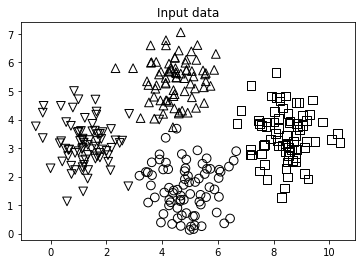

In [3]:
# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

* Data yang telah didefinisikan tadi, kemudian divisualisasikan enagn scatter plot untuk melihat distribusi datanya. 
* Dari grafik diatas terlihat bahwa data yang digunakan memiliki 4 buah label

In [4]:
# Number of nearest neighbors 
num_neighbors = 12

* Nilai **k (neigbors)** didefinisikan sebesar 12, artinya kita akan mengambil 12 titik terdekat dari data inputan yang kita masukkan.

In [5]:
# Step size of the visualization grid
step_size = 0.01  

* **step_size** digunakan untuk menentukan step dalam proses komparasi untuk mencari nilai data terdekat yang memiliki kemiripan.

In [6]:
# Create a K Nearest Neighbours classifier model 
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

* Pada tahap ini dibuat sebuah model **K-Nearest Neighbor (KNN)** dengan parameter nilai **k** dan pembobotan berupa jarak.

In [7]:
# Train the K Nearest Neighbours model
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

* Dengan Model yang telah dibuat tadi kemudian dilakukan training menggunakan data **X** sebagai predictor dan data **y** sebagai labelnya. 

In [8]:
# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

* Untuk melihat hasil training model, dibuat sebuah mesh untuk visualisasi agar batasan antar label(target) dapat terlihat, sehingga memudahkan proses analisa. 

Text(0.5, 1.0, 'K Nearest Neighbors classifier model boundaries')

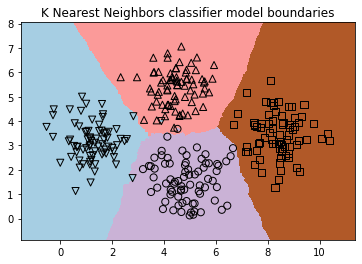

In [9]:
# Evaluate the classifier on all the points on the grid 
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Visualize the predicted output 
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)

# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

* Grafik diatas merupakan batasan antar label yang sudah diklasifikasikan dengan menggunakan model KNN.
* Terlihat bahwa ada 4 area dengan warna yang berbeda-beda, setiap warna merepresentasikan class dari label yang berbeda. 

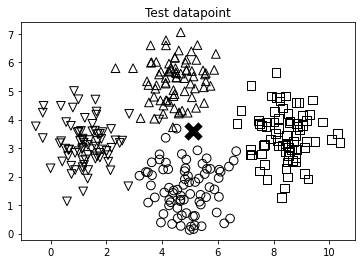

In [10]:
# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

* Dengan menggunakan sebuah input baru, akan dilakukan ujicoba terhadap model KNN ini. 
* Titik data tersebut digambarkan dengan tanda **x**, titik data ini akan mencari 12 titik data lainnya yang paling berdekatan dan memiliki kemiripan.

Predicted output: 1


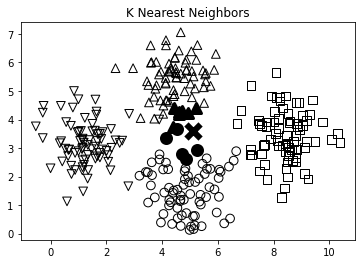

In [11]:
# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()

* Disini terlihat bahwa ada 12 titik data disekitar **x** yang di **bold**. Titik data inilah yang dianggap paling dekat dan memiliki kemiripan dengn titik **x**. 
* Kemudian dilakukan perhitungan untuk melihat label mana yang memiliki titik terseleksi lebih banyak. Dalam kasus ini yang dibandingkan adalah label **segitiga** dan label **lingkaran**.
* **Label lingkaran** hanya memiliki **5** titik data yang terseleksi, sedangkan **label segitiga** memiliki **7** titik data yang terseleksi. Sehingga dapat disimpulkan bahwa titik data **x** masuk kedalam class **label segitiga** atau dalam hal ini **y = 1**.